<a href="https://colab.research.google.com/github/hdhd7/MalashinLabs/blob/main/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

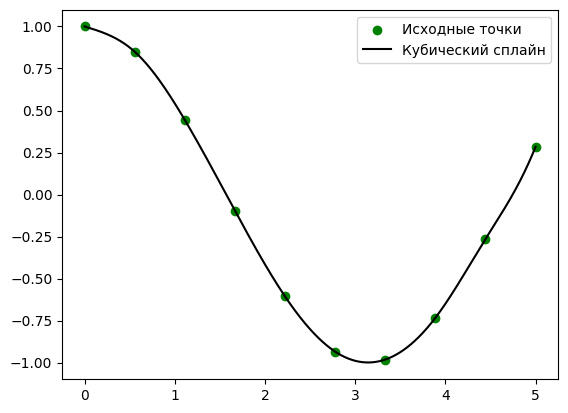

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline(x, y):
    n = len(x)
    h = np.diff(x) #разности между соседними значениями в массиве x (длины отрезков)
    alpha = np.zeros(n)
    for i in range(1, n - 1):
        alpha[i] = 3 / h[i] * (y[i + 1] - y[i]) - 3 / h[i - 1] * (y[i] - y[i - 1]) #нужен для учёта 2 производного условия
                                #сплайна; часть системы уравнений для нахождения коэффициентов второго порядка (вектора c)

    #переменные для рассчета коэффициентов
    l = np.ones(n)
    mu = np.zeros(n) #вторые производные сплайнов в каждой точке
    z = np.zeros(n)
    for i in range(1, n - 1):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    b = np.zeros(n)
    c = np.ones(n)
    d = np.zeros(n)
    for j in range(n - 2, -1, -1):
        c[j] = z[j] - mu[j] * c[j + 1] #наклона первого порядка
        b[j] = (y[j + 1] - y[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3 #второго порядка
        d[j] = (c[j + 1] - c[j]) / (3 * h[j]) #третьего порядка / описывающие кривизну

    return b, c, d

def evaluate_spline(x, a, b, c, d, xi): #вычисление сплайна в точке xi
    idx = np.searchsorted(x, xi) #находим, в каком сегменте находится xi
    idx = np.clip(idx, 1, len(x) - 1) - 1 #расстояние от текущей точки сегмента
    h = xi - x[idx]
    return a[idx] + b[idx] * h + c[idx] * h**2 + d[idx] * h**3 #сегмент, на котором находится точка

#генерация случайных точек
np.random.seed(52)
num_points = 10
x_data = np.linspace(0, 5, num_points)
y_data = np.cos(x_data)
b, c, d = cubic_spline(x_data, y_data)

#генерация кривой сплайна гладкая сетка для значений и рассчет примерных y
x_spline = np.linspace(min(x_data), max(x_data), 10000) #10 тысяч точек для гладкого графика сплайна
y_spline = [evaluate_spline(x_data, y_data, b, c, d, xi) for xi in x_spline] #для каждой точки xi вычисляем значение сплайна
                                                                             #с помощью функции evaluate_spline

#визуализация
plt.scatter(x_data, y_data, label='Исходные точки', color='green')
plt.plot(x_spline, y_spline, label='Кубический сплайн', color='black')
plt.legend()
plt.show()